# Sesión: 4 de octubre
## Módulo 7
### Tensorflow para redes neurales

Recuerden que habíamos dicho que Tensorflow era un marco de optimización, particularmente útil para redes neuroles.

La instalación en Colab es tan sencilla como quitarle el #
a la siguiente línea de código para que lo instale

In [1]:
#pip install tensorflow

In [45]:
# Librerías y funcionalidad propiamente de tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad # Aunque hay otro más... lo veremos al ratito
from tensorflow.keras.datasets import mnist # Dataset famoso para jugar

# Librerías clásicas de python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Cargar datos del dataset MNIST (dígitos escritos a mano, codificados en pixeles)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:

# Los pixeles varían de 1 a 255
# Un poco de preprocesamiento
# Un escalamiento
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encoding para las etiquetas
# Recuérdese que son imágenes individuales de los dígitos del 0, 1, ...., 9
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

La magia de tensorflow es que se puede construir modelos con una sintaxis muy muy muy sencilla e intuitiva

In [7]:
# Se construye un modelo muy sencillo
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)), MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'), MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'), MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Eliminar datos al 50%
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Cómo se ve el objeto model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Importante!!! En tensorflow hay una componente de compilación y otra de entranamiento
# Recuérdese que tensorflow está escrito en lenguaje C, que es un lenguaje que requiere compilación
# Convertir mi código en un binario que entienda la computadora
model.compile(optimizer=Adam(), # Método de optimización
              loss='categorical_crossentropy', # La función de pérdida para un problema de clasificación multi-clase
              metrics=['accuracy']) # En qué proporción de datos, la clasificación fue correcta

In [11]:
# Parte de entrenamiente
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.9694 - loss: 0.1039 - val_accuracy: 0.9782 - val_loss: 0.0679
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 105ms/step - accuracy: 0.9780 - loss: 0.0783 - val_accuracy: 0.9836 - val_loss: 0.0557
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.9820 - loss: 0.0640 - val_accuracy: 0.9846 - val_loss: 0.0508
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.9825 - loss: 0.0582 - val_accuracy: 0.9842 - val_loss: 0.0513
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.9870 - loss: 0.0446 - val_accuracy: 0.9809 - val_loss: 0.0653


In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy de prueba: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9764 - loss: 0.0792
Accuracy de prueba: 0.9815999865531921


In [ ]:
# Tareita moral, correr con epochs = 8, 10, 20 ¿Mejora el accuracy de prueba?

## Segundo ejemplo
Utilizaremos un dataset más parecido a los que están acostumbrados...

Data set de la calidad del vino

In [13]:
# Ocuparé pandas para leer este dataset
df = pd.read_csv('/content/WineQT.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [14]:
# Le estoy quitando la columna de ID porque no sirve de nada
df = df.drop(columns=['Id'])

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
# Esta es otra forma de construir los conjuntos de entrenamiento y validación
train_df = df.sample(frac=0.75, random_state=4) # Quédate con el 75%
val_df = df.drop(train_df.index) # Y el resto es el conjunto de validación

# Un poco de preprocesamiento manual min-max manual
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

range = max_val - min_val
train_df = (train_df - min_val)/(range)

val_df =  (val_df- min_val)/range

In [17]:
# Especificaremos quién es la variable objetivo: 'quality'
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

input_shape = [X_train.shape[1]]

input_shape

[11]

In [18]:
# Vamos a construir un modelo muy muy sencillo, de hecho sólo tiene una capa
model = Sequential([
Dense(units=1,input_shape=input_shape)])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Una especificación de 3 capas
model = Sequential([
    Dense(units=64, activation='relu', input_shape=input_shape),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

Moraleja: Las arquitecturas de las red neuronal, hace crecer rápidamente el número de parámetros

In [29]:
# Fase compilación
model.compile(optimizer='adam', loss='mae') # Error absoluto medio

In [30]:
losses = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                   batch_size=256,
                   epochs=10
                   )

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.5251 - val_loss: 0.4420
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4072 - val_loss: 0.3310
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2990 - val_loss: 0.2172
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1928 - val_loss: 0.1379
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1375 - val_loss: 0.1381
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1499 - val_loss: 0.1456
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1534 - val_loss: 0.1321
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1376 - val_loss: 0.1230
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1252 - val_loss: 0.1233
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1253 - val_loss: 0.1231


In [31]:
# Vamos a hacer predicciones sólo en algunas observaciones
# Sólo obtendré el y gorro en las primeras 5 observaciones del conjunto de prueba
model.predict(X_val.iloc[0:6, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[0.39398465],
       [0.3945359 ],
       [0.35362855],
       [0.34853166],
       [0.40459353],
       [0.4061627 ]], dtype=float32)

In [ ]:
# Recuerden que escalamos a mano
# train_df = (train_df - min_val)/(range)
# val_df =  (val_df- min_val)/range

In [33]:
# Voy a extraer los valores de la función de pérdida en todas los pasos del entranamiento
loss_df = pd.DataFrame(losses.history)
loss_df

,loss,val_loss
0,0.512568,0.441972
1,0.399838,0.330998
2,0.288450,0.217178
3,0.183675,0.137871
4,0.137057,0.138135
5,0.151625,0.145634
6,0.151622,0.132068
7,0.134308,0.123031
8,0.125118,0.123268
9,0.123907,0.123066


<Axes: >

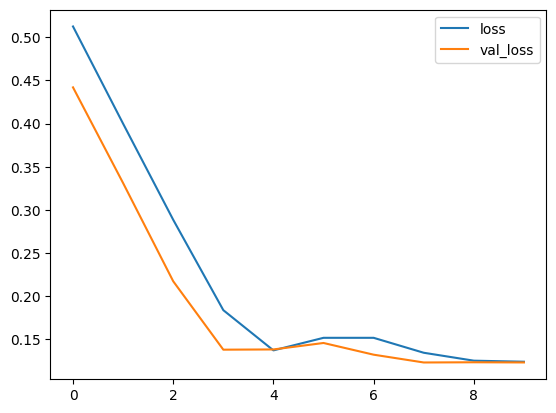

In [34]:
loss_df.loc[:,['loss','val_loss']].plot()

## Cambiar el método de optimización

Durante el módulo, revisaron varios méodos de optimización, hasta ahorita hemos hecho todo con el Adam.... Por supuesto lo podemos cambiar

In [41]:
model = Sequential([
    Dense(units=64, activation='relu', input_shape=input_shape),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])
# En la instrucción del compile, le cambié el método al Descenso Gradiente Estocástico
# SGD optimizer i.e. Stochastic Gradient Descent
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='mse')
losses = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                   batch_size=256,
                   epochs=10
                   )

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.1372 - val_loss: 0.0423
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0438 - val_loss: 0.0506
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0641 - val_loss: 0.0447
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0438 - val_loss: 0.0235
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0297 - val_loss: 0.0365
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0372 - val_loss: 0.0277
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0287 - val_loss: 0.0200
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0241 - val_loss: 0.0216
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0266 - val_loss: 0.0192
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0239 - val_loss: 0.0196


In [42]:
loss_df = pd.DataFrame(losses.history)
loss_df

,loss,val_loss
0,0.128667,0.042345
1,0.040713,0.050579
2,0.065855,0.044664
3,0.040408,0.023512
4,0.030573,0.036451
5,0.036777,0.027699
6,0.026927,0.020001
7,0.025382,0.021632
8,0.026296,0.019243
9,0.023299,0.019622


<Axes: >

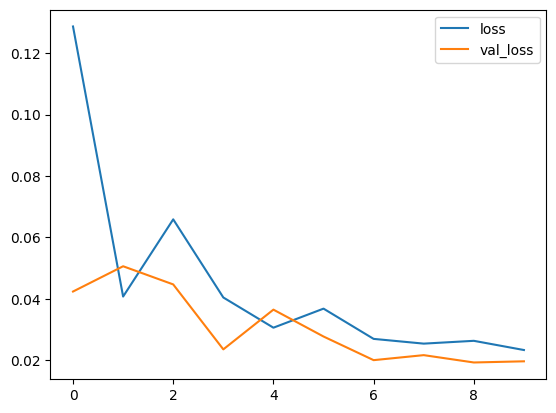

In [43]:
loss_df.loc[:,['loss','val_loss']].plot()

In [46]:
model = Sequential([
    Dense(units=64, activation='relu', input_shape=input_shape),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

#Adagrad optimizer
model.compile(optimizer=Adagrad(learning_rate=0.01), loss='mse')
losses = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                   batch_size=256,
                   epochs=10
                   )

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.2224 - val_loss: 0.0986
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0819 - val_loss: 0.0454
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0428 - val_loss: 0.0285
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0309 - val_loss: 0.0235
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0277 - val_loss: 0.0216
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0241 - val_loss: 0.0207
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0254 - val_loss: 0.0204
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0236 - val_loss: 0.0203
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0243 - val_loss: 0.0200
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0249 - val_loss: 0.0199


In [47]:
loss_df = pd.DataFrame(losses.history)
loss_df

,loss,val_loss
0,0.197652,0.098636
1,0.076692,0.045375
2,0.039951,0.028477
3,0.029042,0.023534
4,0.026062,0.021623
5,0.024975,0.020676
6,0.024496,0.020428
7,0.024281,0.020277
8,0.024085,0.020019
9,0.023910,0.019857


<Axes: >

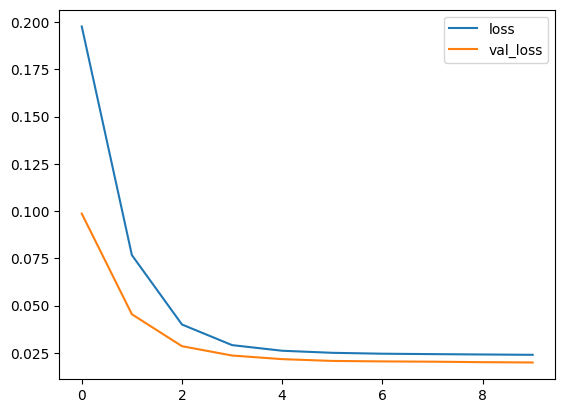

In [48]:
loss_df.loc[:,['loss','val_loss']].plot()

¿Qué otros métodos de optización tiene disponibles tensorflow?

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

## Ejemplo 3: Regresemos al dataset de los dígitos a mano MNIST

In [49]:
# La clásica definición prueba y entrenamiento
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [50]:
gray_scale = 255 # los pixeles varían en un rango de 0 a 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

In [51]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
# Fase de compilación
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
mod = model.fit(x_train, y_train, epochs=5,
          batch_size=2000,
          validation_split=0.2)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.2537 - loss: 2.3101 - val_accuracy: 0.6363 - val_loss: 1.8181
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6608 - loss: 1.6550 - val_accuracy: 0.7897 - val_loss: 1.1579
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7880 - loss: 1.0567 - val_accuracy: 0.8529 - val_loss: 0.7445
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8478 - loss: 0.7060 - val_accuracy: 0.8828 - val_loss: 0.5416
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8766 - loss: 0.5365 - val_accuracy: 0.8957 - val_loss: 0.4374


In [57]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705,440 (2.69 MB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 470,294 (1.79 MB)

In [58]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

Test loss, Test accuracy: [0.44659727811813354, 0.8930000066757202]


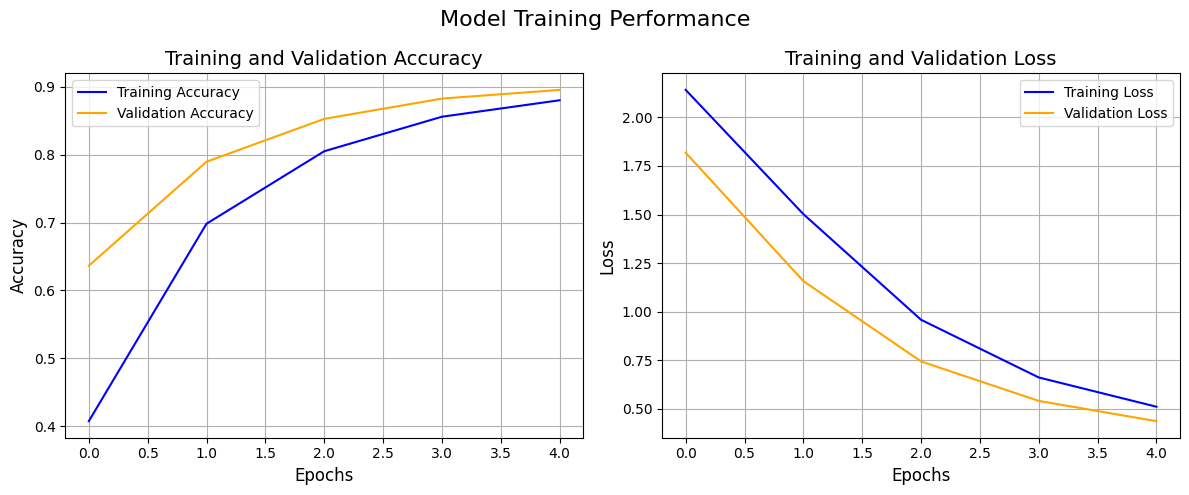

In [59]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mod.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(mod.history['val_accuracy'],
         label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(mod.history['loss'], label='Training Loss', color='blue')
plt.plot(mod.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()

In [60]:
# Hagamos un modelo con más épocas
mod = model.fit(x_train, y_train, epochs=10,
          batch_size=2000,
          validation_split=0.2)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.8911 - loss: 0.4425 - val_accuracy: 0.9046 - val_loss: 0.3778
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9025 - loss: 0.3851 - val_accuracy: 0.9112 - val_loss: 0.3404
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9054 - loss: 0.3523 - val_accuracy: 0.9171 - val_loss: 0.3123
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9129 - loss: 0.3208 - val_accuracy: 0.9212 - val_loss: 0.2917
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9190 - loss: 0.2957 - val_accuracy: 0.9247 - val_loss: 0.2746
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9235 - loss: 0.2784 - val_accuracy: 0.9289 - val_loss: 0.2606
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9252 - loss: 0.2640 - val_accuracy: 0.9320 - val_loss: 0.2482
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9291 - loss: 0.2525 - val_accuracy: 0.9332 - v

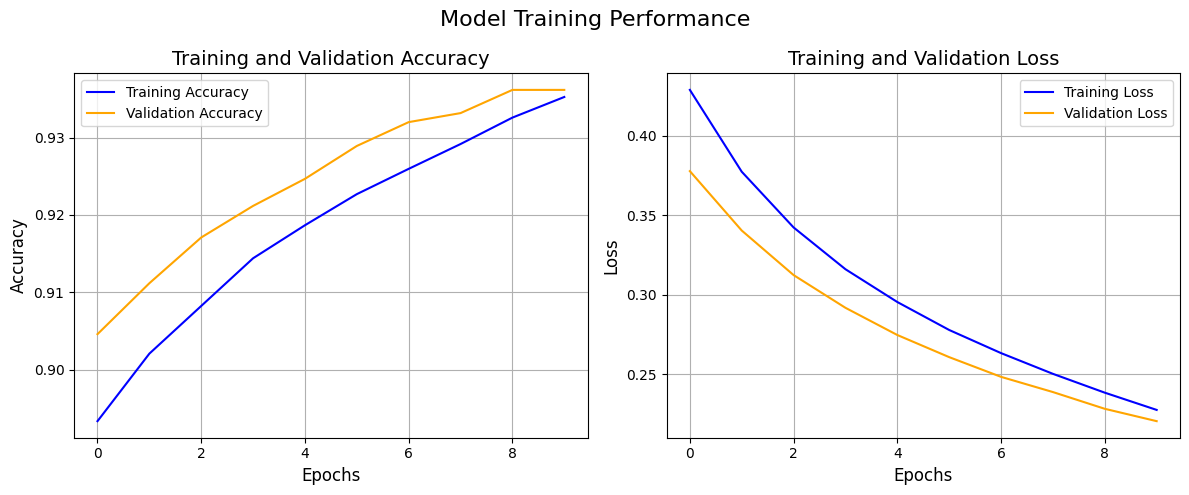

In [61]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mod.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(mod.history['val_accuracy'],
         label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(mod.history['loss'], label='Training Loss', color='blue')
plt.plot(mod.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()

# Funciones de activación en Tensorflow

https://www.tensorflow.org/api_docs/python/tf/keras/activations

In [ ]:
# Función de activación ReLU
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(32,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Tanh
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(32,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Leaky ReLU
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(32,)),
    tf.keras.layers.LeakyReLU(alpha=0.3),  # Permite pendiente negativa para valores no-positivos
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Función de activación sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(32,)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Se usa para clasificación binaria
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Softmax
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(32,)),
    tf.keras.layers.Dense(10, activation='softmax')  # Para clasif multi-clase
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])